<a href="https://colab.research.google.com/github/hank199599/data_science_from_scratch_reading_log/blob/main/Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 線性代數
數學的一個分支，處理**向量空間**的問題

# 向量
它可以被視為有限維度裡的點，  
可以彼此**相加**或**乘上純量**形成一個新向量


## 型別別名(type alias)
向量在Python上的實作，即一個**浮點數列表**

In [ ]:
from typing import List

Vector = List[float]

height_weight_age=[70,170,40] #[英寸、磅、歲]

grades=[95,80,75,62] #[第1次考試成績、第2次考試成績、第3次考試成積、第4次考試成積]

## 建立運算工具
Python不提供相應的向量運算工具，因此我們需要自己定義這些工具  
透過zip將兩個向量壓合起來，再利用**解析式列表**進行運算

## 加法運算
每個元素逐一加起來  
  
舉例來說：
```
[1,2]+[2,1] = [1+2,2+1] = [3,3]
```



In [ ]:
def add( v:Vector, w:Vector) -> Vector:
  assert len(v) == len(w) ,"兩個向量必須有相同的維度"

  return [ v_i+w_i for v_i,w_i in zip(v,w)]

In [ ]:
add([1,2,3],[4,5,6])

[5, 7, 9]

### 圖 4-1 向量加法

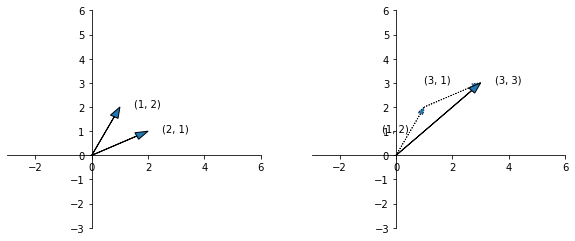

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 繪製向量相加的示意
def plot_adding_vectors():
  # 向量的起始點
  x0 = 0
  y0 = 0
  # 指定向量的終點
  dx1 = 1
  dy1 = 2
  dx2 = 3
  dy2 = 3
  # 指定座標軸的範圍
  plt.xlim(-3, 6)
  plt.ylim(-3, 6)
  ax = plt.gca()
  # 外框隱藏掉兩邊
  ax.spines['top'].set_color('none')
  ax.spines['right'].set_color('none')
  # 將剩餘的兩邊外框挪到原點
  ax.xaxis.set_ticks_position('bottom')
  ax.spines['bottom'].set_position(('data',0))
  ax.yaxis.set_ticks_position('left')
  ax.spines['left'].set_position(('data',0))
  # 標註文字
  adjust = 0.5
  ax.annotate('({}, {})'.format(dx1, dy1), xy=(dx1, dy1), xytext=(dx1 - adjust*3, dy1 - adjust*2))
  ax.annotate('({}, {})'.format(3, 1), xy=(dx2, dy2), xytext=(dx2 - adjust*4, dy2))
  ax.annotate('({}, {})'.format(dx2, dy2), xy=(dx2, dy2), xytext=(dx2 + adjust, dy2))
  # 畫出向量
  plt.arrow(x0, y0, dx1, dy1, length_includes_head=True, head_width=0.2, ls='dotted')
  plt.arrow(dx1, dy1, 2, 1, length_includes_head=True, head_width=0.2, ls = 'dotted')
  plt.arrow(x0, y0, dx2, dy2, length_includes_head=True, head_width=0.3)
# 繪製
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plot_two_vectors()
plt.subplot(1, 2, 2)
plot_adding_vectors()


### 同時加多個向量

In [ ]:
def vector_sum(vectors:List[Vector]) -> Vector:
  #先檢查vertors這個向量列表是否為空
  assert vectors,"列表中沒有向量!"

  #檢查vertors 向量列表內的所有向量都具有相同的維度
  num_elements=len(vectors[0])
  assert all(len(v)==num_elements for v in vectors),"向量維度不一致"

  #所有vectors[i]相加起來，是結果的第i個元素值
  return [sum(vector[i] for vector in vectors) for i in range(num_elements)]


In [ ]:
vector_sum([[1,2],[3,4],[5,6],[7,8]])

## 減法運算
每個元素逐一相減起來  
  
舉例來說：
```
[1,2]-[2,1] = [1-2,2-1] = [-1,1]
```



In [ ]:
def subtrate( v:Vector, w:Vector) -> Vector:
  assert len(v) == len(w) #兩個向量必須有相同的維度

  return [ v_i-w_i for v_i,w_i in zip(v,w)]

In [ ]:
subtrate([5,7,9],[4,5,6])

## 乘上純量
讓向量的每一個元素都乘以同一個值

In [ ]:
def scalar_multiply(c:float,v:Vector) -> Vector:
  return [c*v_i for v_i in v]

In [ ]:
scalar_multiply(2,[1,2,3])

## 計算每個元素的平均值

In [ ]:
def vector_mean(vectors:List[Vector])->Vector:
  n=len(vectors)
  return scalar_multiply(1/n,vector_sum(vectors))


In [ ]:
vector_mean([[1,2],[3,4],[5,6]])

## 點積(dotproduct)
相應元素相乘之後加總的結果

In [ ]:
def dot(v:Vector,w:Vector)->float:
  #計算v_1*w_1+... +v_n*w_n
  assert len(v)==len(w),"兩個向量必須有相同的維度"

  return sum(v_i*w_i for v_i,w_i in zip(v,w))

In [ ]:
dot([1,2,3],[4,5,6])

如果w長度為1，擇點積所測量得就是向量v在w方向上的分量。  
  
例如：w=[1,0] → dot(v,w) 就等於向量v的第一個元素值，即向量v投影在向量w上的向量長度

## 平方和
送回v_1 * v_1 + ...... + v_n * v_n

In [ ]:
def sum_of_squares(v:Vector) -> float:
  return dot(v,v)

In [ ]:
sum_of_squares([1,2,3])

## 向量的長度(magnitude)
送回 v 的長度(或大小)  

In [ ]:
import math

def magnitude(v:Vector)->float:
  return math.aqrt(sum_of_squares(v)) #math.sqrt 是計算平方根的一個函式


## 兩個向量間的距離

**粗體文字**

In [ ]:
def squared_distance(v:Vector,w:Vector) -> float:
  return sum_of_squares(subtrate(v,w))

def distance(v:Vector,w:Vector) -> float:
  return math.sqrt(squared_distance(v,w))

## 等價寫法

In [ ]:
def distance(v:Vector,w:Vector) -> float:
  return magnitude(subtract(v,w))

# 矩陣
一種二維的數字型態，常用**列表的列表(list of list)**來表示

A[i][j]→第i橫行(row) 第j縱列(column)

In [ ]:
Matrix=List[List[float]] #另一種型別別名

In [ ]:
A=[[1,2,3],
 [4,5,6]]

A #兩個橫行，三個縱列

[[1, 2, 3], [4, 5, 6]]

In [ ]:
B=[[1,2],
  [3,4],
  [5,6]]

B #三個橫行，兩個縱列

[[1, 2], [3, 4], [5, 6]]

# 計算矩陣的形狀(shape)


In [ ]:
from typing import Tuple

def shape(A:Matrix) -> Tuple[int,int]:

  num_rows=len(A)
  num_cols=len(A[0]) if A else 0
  return num_rows,num_cols

In [ ]:
shape([[1,2,3],[4,5,6]])

(2, 3)

如果矩陣有n列k行，可以說它是n×k矩陣。  
以線性代數的觀點可以將矩陣視為：
* 每一行是一個長度為k的向量
* 每一列是一個長度為n的向量

In [ ]:
def get_row(A:Matrix,i:int)->Vector:
  return A[i]


#針對每一行取A_i，接著去A_i這行的第j個元素放入新的陣列
def get_col(A:Matrix,j:int)->Vector:
  return [A_i[j] for A_i in A]

In [ ]:
get_row([[1,2,3],[4,5,6],[7,8,9]],0)

[1, 2, 3]

In [ ]:
get_col([[1,2,3],[4,5,6],[7,8,9]],0)

[1, 4, 7]

## 生成矩陣元素的函式
使用一個巢狀的解析式列表來創建出一個矩陣

In [ ]:
from typing import Callable

#送回一個num_rows * num_cols 的矩陣，其中第(i,j)項就是entry_fn(i,j)
def make_matrix(num_rows:int,num_cols:int,entry_fn:Callable[[int,int],float])->Matrix:

  return [[ entry_fn(i,j)        # 給定 i ，就能建立長度為 j 的列表
        for j in range(num_cols)] # [entry_fn(i,0),...]
        for i in range(num_rows)] # 針對每個i都建立一個列表

### 建立單位矩陣

In [ ]:
def identity_matrix(n:int) ->Matrix:
  return make_matrix( n,n,lambda i,j:1 if i==j else 0)

In [ ]:
identity_matrix(5)

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

## 採用矩陣的理由
1. 如果有很多向量組合成一個資料集，可以用矩陣來表示
2. 把n×k矩陣當成一個線性函式，把k維的向量映射到n維的向量
3. 用來表達**二元關係(binary relationship)**

### 二元關係(binary relationship)

原先的做法

In [ ]:
firendship=[(0,1),(0,2),(1,2),(1,3),(2,3),(3,4),
      (4,5),(5,6),(5,7),(6,7),(7,8),(8,9)]

利用二元關係表達  
如果彼此間關係很少，這是一種即沒效率的表達方式。  
但這種資料個是讓我們能輕易找出兩節點間的關係是否成立

In [ ]:
    #user  0,1,2,3,4,5,6,7,8,9
firend__matrix=[[0,1,1,0,0,0,0,0,0,0], #user0
        [1,0,1,1,0,0,0,0,0,0], #user1
        [1,1,0,1,0,0,0,0,0,0], #user2
        [0,1,1,0,1,0,0,0,0,0], #user3
        [0,0,0,1,0,1,0,0,0,0], #user4
        [0,0,0,0,1,0,1,1,0,0], #user5
        [0,0,0,0,0,1,0,0,1,0], #user6
        [0,0,0,0,0,1,0,0,1,0], #user7
        [0,0,0,0,0,0,1,1,0,1], #user8
        [0,0,0,0,0,0,0,0,1,0]] #user9

In [ ]:
firend__matrix[0][2] # 0與2是朋友關係

1

In [ ]:
firend__matrix[0][8] # 0與8沒有朋友關係

0

### 練習
利用課本提供的firend__matrix建立一個函式：  
輸入特定使用者編號後，以矩陣形式返還與該編號使用者有朋友關係的人

In [ ]:
def frined_of_num(i:int) -> Matrix:
  temp=firend__matrix[i] #取出指定的朋友關係陣列
  return [ "user"+str(j) for j in range(len(temp)) if temp[j]==1]

In [ ]:
frined_of_num(5)

['user4', 'user6', 'user7']